# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## <font color='blue'>Mínimos Quadrados</font>

### Material produzido por Luis Gustavo Nonato
---
ICMC-USP

### Conteúdo
- Equação Normal
- Projeção em Subespaços
- Aproximação de Funções
- Mínimos Quadrados Ponderados

## <font color='blue'>Equação Normal</font>

Considere uma matriz $\mathbf{A}$ com $n$ linhas e $k$ colunas e vamos assumir que $n\geq k$.

**Pergunta:** O sistema linear $\mathbf{A}\mathbf{x}=\mathbf{b}$ tem solução?

A resposta para a pergunta acima é: depende, se $\mathbf{b}$ é um vetor no espaço coluna de $\mathbf{A}$, então o sistema tem solução, pois neste caso existe um conjunto de coeficientes  tal que:

$$
\mathbf{A}\mathbf{x}=
\begin{bmatrix}
| &  & |\\
\mathbf{a}_1  & \cdots & \mathbf{a}_k\\
| &  & |
\end{bmatrix}
\begin{bmatrix}
x_1 \\ \vdots \\ x_k
\end{bmatrix}=
x_1\mathbf{a}_1 + \cdots + x_k\mathbf{a}_k = \mathbf{b}
$$

A questão é, e se $\mathbf{b}$ não está no espaço coluna de $\mathbf{A}$? Neste caso, o sistema não tem solução. Porém, podemos buscar por uma melhor solução possível, como por exemplo o vetor $\mathbf{x}$ que minimize a diferença

$$
\|\mathbf{A}\mathbf{x} - \mathbf{b}\|^2
$$

Como $\mathbf{A}\mathbf{x}$ é um vetor no espaço coluna de $\mathbf{A}$, o que procuramos é um conjunto de coeficientes $\mathbf{x}$ tal que a distância de $\mathbf{b}$ até o ponto $\mathbf{p}=\mathbf{A}\mathbf{x}$ seja mínima.

Como o vetor $\mathbf{b}-\mathbf{p}$ tem que ser ortogonal ao espaço coluna de $\mathbf{A}$ para que $\|\mathbf{A}\mathbf{x} - \mathbf{b}\|^2$ seja mínimo (justifique esta afirmação), temos entao que:

$$
\mathbf{A}^\top(\mathbf{b}-\mathbf{p})=0\\
\downarrow\\
\mathbf{A}^\top(\mathbf{b}-\mathbf{A}\mathbf{x})=0\\
\downarrow\\
\mathbf{A}^\top\mathbf{A}\mathbf{x}=\mathbf{A}^\top\mathbf{b}
$$

Note que a matriz $\mathbf{A}^\top\mathbf{A}$ é uma matriz quadrada $k\times k$, logo, se o sistema linear tiver solução conseguimos calcular os coeficientes $\mathbf{x}$ e, consequentemente, o ponto $\mathbf{p}$. O sistema $\mathbf{A}^\top\mathbf{A}\mathbf{x}=\mathbf{A}^\top\mathbf{b}$ é chamado de **equação normal** do método de mínimos quadrados.

Portanto, a questão é: A matriz $\mathbf{A}^\top\mathbf{A}$ é inversível? Em outras palavras,  a matriz tem posto $k$ (os vetores coluna são LI)?

Note que a matriz $\mathbf{A}^\top\mathbf{A}$ tem o mesmo espaço nulo da matriz $\mathbf{A}$. De fato, 

$$
\mathbf{A}\mathbf{x}=0\rightarrow\mathbf{A}^\top\mathbf{A}\mathbf{x}=0\\
\mathbf{A}^\top\mathbf{A}\mathbf{x}=0\rightarrow\mathbf{x}^\top\mathbf{A}^\top\mathbf{A}\mathbf{x}=0\rightarrow (\mathbf{A}\mathbf{x})^\top(\mathbf{A}\mathbf{x})=0\rightarrow \|\mathbf{A}\mathbf{x}\|^2=0\rightarrow\mathbf{A}\mathbf{x}=0
$$

Logo, **se $\mathbf{A}$ tem colunas LI**, então $\mathbf{A}^\top\mathbf{A}$ tem colunas LI e **a equação normal tem solução**.

**Importante**: A solução $\mathbf{x}$ não é o ponto no espaço coluna, mas sim os coeficientes da combinação linear dos vetores colunas que gera o ponto, ou seja, o ponto no espaço coluna é dado por $\mathbf{p}=\mathbf{A}\mathbf{x}$.

**Obs**: $\mathbf{A}$ é inversível se e so se as colunas de $\mathbf{A}$ são LI se e so se $det(\mathbf{A})\neq0$

## <font color='blue'> Projeção em Subespaços</font>

O ponto $\mathbf{p}=\mathbf{A}\mathbf{x}$ é a projeção de $\mathbf{b}$ no subespaço gerado pelas colunas da matriz $\mathbf{A}$. Especificamente, temos que:

$$
\mathbf{p} = \mathbf{A}\left((\mathbf{A}^\top\mathbf{A})^{-1}\mathbf{A}^\top\mathbf{b}\right)
$$

A matriz $\mathbf{A}(\mathbf{A}^\top\mathbf{A})^{-1}\mathbf{A}^\top$ é a **matriz de  projeção** sobre o espaço coluna de $\mathbf{A}$. Tal matriz projeta qualquer vetor sobre o espaço coluna de $\mathbf{A}$.

### Exemplo: 
Vamos encontrar a projeção de um ponto qualquer do espaço $\mathbb{R}^3$ sobre o plano dado pela equacão $x+y+z=0$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Vamos encontrar uma base para o espaço correspondendo ao plano x+y+z=0
# e armazena-la como colunas de uma matriz A
A = np.array([[1,0,-1],[0,-1,1]]).T

# gerando o plano 
xx, yy = np.meshgrid(range(-3,4), range(-3,4))
zz = -xx-yy

# Definindo 5 pontos quaisque em R3
B = np.random.uniform(-2.9,2.9,size=(3,5))

# Projetando os pontos sobre o plano
# encontrando os coeficientes de cada ponto
# At * A * x = At * b Eq. Normal
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, B)
x = np.linalg.solve(AtA, Atb)

# encontrando as projeções
P = np.dot(A, x)

# Plot
fig = go.Figure()
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.5, showscale=False, name='Subespaço'))
fig.add_trace(go.Scatter3d(x=B[0,:], y=B[1,:], z=B[2,:], mode='markers', line=dict(color='red'), name='Pontos originais'))
fig.add_trace(go.Scatter3d(x=P[0,:], y=P[1,:], z=P[2,:], mode='markers', line=dict(color='blue'), name='Pontos projetados'))
for i in range(B.shape[1]):
    fig.add_trace(go.Scatter3d(x=[P[0,i],B[0,i]], y=[P[1,i],B[1,i]], z=[P[2,i],B[2,i]], mode='lines', line=dict(width=2, color='black')))

fig.add_trace(go.Scatter3d(x=[0,A[0,0]], y=[0,A[1,0]], z=[0,A[2,0]], mode='lines', line=dict(width=3, color='black'), name='Base'))
fig.add_trace(go.Scatter3d(x=[0,A[0,1]], y=[0,A[1,1]], z=[0,A[2,1]], mode='lines', line=dict(width=3, color='black'), name='Base'))

fig.update_layout(
    scene_aspectmode='data', autosize=False, width=800, height=600,
    margin=dict(l=20,r=20,b=20,t=20,pad=4),
    paper_bgcolor="LightSteelBlue",
    showlegend=False
)
fig.show()

## <font color='blue'> Aproximação de Funções </font>

Suponha que um conjunto de amostras $(t_i,f(t_i))$, $i=1,\ldots,n$ seja fornecido. Tais anostras podem ser, por exemplo, medidas de temperatura $f(t_i)$ no instante $t_i$. A função $f$ não é conhecida, o que temos são apenas valores da função em alguns pontos específicos.

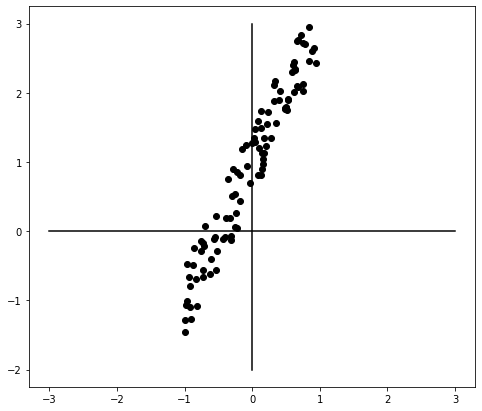

In [4]:
X = np.random.uniform(-1,1,size=(2,100))
X[1,:] = 1 + 2*X[0,:] + np.random.uniform(-0.5,0.5,100)

# gerando eixos de R^2
plt.figure(figsize=(8,7))
plt.plot([-3,3],[0,0],color='k')
plt.plot([0,0],[-2,3],color='k')

# plotando os pontos
plt.scatter(X[0,:],X[1,:],color='k')
plt.show()

Se quisessemos fazer uma previsão da temperatura em algum instante de tempo onde a medição não foi realizada, precisariamos conhecer, ou pelo menos aproximar a função $f$ de alguma forma. Analisando o plot, vemos que a temperatura varia de forma proximadamente linear. Portanto, podemos supor que a função temperatura seria linear, ou seja:

$$
f(t) = a_1 + a_2t
$$

A questão é como encontrar os valores de $a_1$ e $a_2$. Buscamos encontrar tais valores de modo a:

$$
\begin{matrix}
a_1 + a_2t_1 \approx f(t_1)\\
a_1 + a_2t_2 \approx f(t_2)\\
\vdots \\
a_1 + a_2t_n \approx f(t_n)\\
\end{matrix}
$$

Podemos escrever na forma matricial como:
$$
\begin{bmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots & \vdots \\
1 & t_n \\
\end{bmatrix}
\begin{bmatrix}
a_1 \\ a_2
\end{bmatrix}\approx
\begin{bmatrix}
f(t_1)\\
f(t_2)\\
\vdots \\
f(t_n)
\end{bmatrix}\rightarrow
\mathbf{A}\mathbf{\alpha}=\mathbf{f}
$$

Podemos interpretar as colunas da matriz como sendo vetores em $\mathbb{R}^n$, assim como o vetor da direita. Logo, o que temos é um espaço de dimensão 2 em $\mathbb{R}^n$ gerado pelas colunas da matriz$\mathbf{A}$ e um ponto $\mathbb{R}^n$ dado pelo vetor $\mathbf{f}$. Desta forma, podemos encontrar valores $a_1$ e $a_2$ resolvendo a equação nomal associada ao sistema  acima, ou seja,

$$
\mathbf{A}^\top\mathbf{A}\mathbf{\alpha}=\mathbf{A}^\top\mathbf{f}
$$

2.0350402517102064


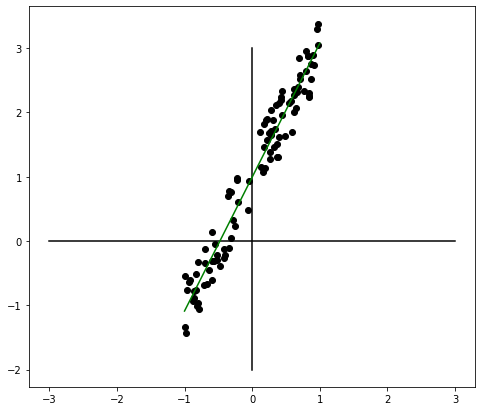

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(-1,1,size=(2,100))
X[1,:] = 1 + 2*X[0,:] + np.random.uniform(-0.5,0.5,100)

# gerando eixos de R^2
plt.figure(figsize=(8,7))
plt.plot([-3,3],[0,0],color='k')
plt.plot([0,0],[-2,3],color='k')

# plotando os pontos
plt.scatter(X[0,:],X[1,:],color='k')

# Construindo a matriz A
A = np.ones((X.shape[1],2))
A[:,1] = X[0,:]

AtA = np.dot(A.T, A)
Atb = np.dot(A.T, X[1,:])
alpha = np.linalg.solve(AtA, Atb)

# y = a0 + a1 * x
#y = alpha[0] + alpha[1]*X[0,:]

x = np.linspace(-1,1,100)
p = lambda x: alpha[0] + alpha[1]*x
y = p(x)

# Agora vc pode avaliar a função em qualquer ponto
print(p(0.5))

#plt.plot(X[0,:],y,color='red')
plt.plot(x,y,color='green')
plt.show()

O erro de aproximação, chamado **erro médio quadrático**, é medido por meio da equação:

$$
Erro = \frac{1}{n}\|\mathbf{A}\mathbf{\alpha} - \mathbf{f}\|^2
$$ 

O $\alpha$ obtido pelo método de mínimos quadrados gera o menor erro médio quadrático dentre todos os possíveis vetores $\alpha$.

In [6]:
y = p(X[0,:])
erro = np.linalg.norm(y - X[1,:])**2 / X.shape[1]
print('O erro de aproximação é:', erro)

O erro de aproximação é: 0.08623776853876482


O método acima também pode ser utilizado para aproximar função que não são lineares. Por exemplo, considere o conjunto de pontos armazenados no arquivo `temperatura.dat`. Este aquivo contém medidads de temperatura no intervalo de um ano, armazenadas nas linhas do arquivo.

In [7]:
# carregando o arquivo
X = np.loadtxt('temperatura.dat')

# plotando os pontos
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], color='k')
plt.show()

OSError: ignored

O comportamento da temperatura não é linear, mas pode ser modelado por uma função quadrática ou cúbica. Vamos supor uma aproximação por um polinômio cúbico da forma $y=a_0+a_1t+a_2t^2+a_3t^3$, assim buscamos:

$$
\begin{matrix}
a_0 + a_1t_1 + a_2t_1^2 + a_3t_1^3  \approx f(t_1)\\
a_0 + a_1t_2 + a_2t_2^2 + a_3t_2^3  \approx f(t_2)\\
\vdots \\
a_0 + a_1t_n + a_2t_n^2 + a_3t_n^3  \approx f(t_n)\\
\end{matrix}
$$

Na forma matricial, as equações acima são escritas como:
$$
\begin{bmatrix}
1 & t_1 & t_1^2 & t_1^3\\
1 & t_2 & t_2^2 & t_2^3\\
\vdots & \vdots \\
1 & t_n & t_n^2 & t_n^3\\
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ a_2 \\ a_3
\end{bmatrix}\approx
\begin{bmatrix}
f(t_1)\\
f(t_2)\\
\vdots \\
f(t_n)
\end{bmatrix}\rightarrow
\mathbf{A}\mathbf{\alpha}=\mathbf{f}
$$

In [2]:
# Construindo a matrix

#A = np.ones((X.shape[0],4))
#A[:,1] = X[:,0]**1
#A[:,2] = X[:,0]**2
#A[:,3] = X[:,0]**3
## OU
#A = np.ones((X.shape[0],4))
#for i in range(1,4):
#    A[:,i] = X[:,0]**i
## OU

#A = np.vander(X[:,0], 4, increasing=True) # Grau 3

#AtA = np.dot(A.T, A)
#Atb = np.dot(A.T, X[:,1])
#alpha = np.linalg.solve(AtA, Atb)

def mmq_poly(x, y, n): # Grau n
    A = np.vander(x, n+1, increasing=True) 
    AtA = np.dot(A.T, A)
    Atb = np.dot(A.T, y)
    alpha = np.linalg.solve(AtA, Atb)
    return alpha

alpha = mmq_poly(X[:,0], X[:,1], 3)

# P(x) = a0 + a1*x + a2*x^2 + a3*x^3
p = lambda x: alpha[0] + alpha[1] * x + alpha[2] * x**2 + alpha[3] * x**3

#x = X[:,0]
x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y = p(x)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],color='k', alpha=0.6) # plotando os pontos
plt.plot(x, y, color='red', linewidth=3)   # plotando o polinômio
plt.show()

NameError: ignored

In [1]:
y = p(X[:,0])
errov = y - X[:,1]
erro = np.linalg.norm(errov)**2 / X.shape[0]

plt.figure(figsize=(8,6))
plt.plot(X[:,0],y, color='red', linewidth=3)
plt.scatter(X[:,0],X[:,1], c=np.abs(errov), cmap='plasma')
plt.show()

NameError: ignored

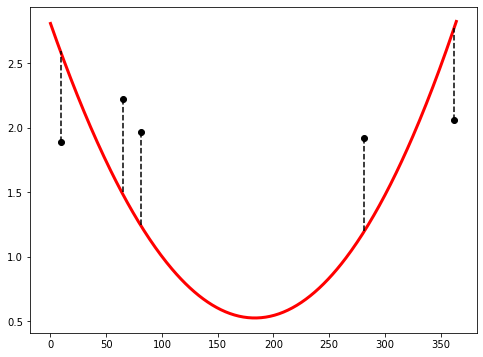

In [ ]:
# visualizando o erro em alguns pontos
errovs = np.argsort(np.abs(errov))
npts = 5

plt.figure(figsize=(8,6))
plt.plot(X[:,0], y, color='red', linewidth=3)
plt.scatter(X[errovs[-npts:],0],X[errovs[-npts:],1],color='k')

for i in errovs[-npts:]:
    plt.plot([X[i,0], X[i,0]], [X[i,1], y[i]], color='k', linestyle='--')

## <font color='blue'> Mínimos Quadrados Ponderados </font>

O método de mínimos quadrados é muito sensível aos dados utilizados no ajuste da função. Vejamos um exemplo:

[0.95099321 1.97759432]
[1.05403871 1.90091406]


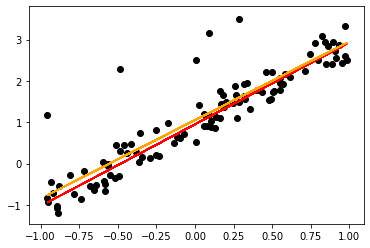

In [ ]:
# Gerando os pontos de ajuste da função
X = np.random.uniform(-1,1,size=(2,100))
X[1,:] = 1 + 2*X[0,:] + np.random.uniform(-0.5,0.5,100)

# plotando os pontos
plt.scatter(X[0,:],X[1,:],color='k')

# Construindo a matriz A
A = np.ones((X.shape[1],2))
A[:,1] = X[0,:]

alpha = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,X[1,:]))
print(alpha)

y = alpha[0] + alpha[1]*X[0,:]
plt.plot(X[0,:],y,color='red')

# perturbando pontos aleatórios
pert = np.random.randint(0,X.shape[1],5)
X[1,pert] += 2.0
plt.scatter(X[0,pert],X[1,pert],color='k')

# Construindo a matriz A
A = np.ones((X.shape[1],2))
A[:,1] = X[0,:]

alpha = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,X[1,:]))
print(alpha)

y = alpha[0] + alpha[1]*X[0,:]
plt.plot(X[0,:],y,color='orange')

Uma forma de evitar que pontos _outliers_ interfiram no processo de ajuste é utilizar pesos, priorizando pontos que são mais "confiáveis". Tal processo é chamado **método dos mínimos quadrados ponderados**. Seja $w_1,\ldots,w_n$ um conjunto de pesos associados a cada uma das amostras. Tai pesos podem ser organizados em uma matriz diagonal quadrada $\mathbf{W}$ $n\times n$, onde $n$ é o número de amostras. Assim, o problema a ser resolvido se torna:

$$
\mathbf{W}\mathbf{A}\mathbf{\alpha}=\mathbf{W}\mathbf{f}
$$

Assim, a solução do problema é dada pelas **equalções normais ponderadas**:

$$
(\mathbf{W}\mathbf{A})^\top(\mathbf{W}\mathbf{A})\mathbf{\alpha}=(\mathbf{W}\mathbf{A})^\top\mathbf{W}\mathbf{f}\\
\downarrow\\
\mathbf{A}^\top\mathbf{W}^\top\mathbf{W}\mathbf{A}\mathbf{\alpha}=\mathbf{A}^\top\mathbf{W}^\top\mathbf{W}\mathbf{f}
$$

O problema que resta é como escolher os pesos a serem utilizados na matrix $\mathbf{W}$. Existem diversas alternativas, sendo que uma das forma mais simples é calcular resolver as equações normais sem considerar os pesos, calcular o erro, e definir a matriz de pesos a partir do erro, dando um peso maior para os pontos com menor erro.

[1.14355298 2.24461982]
[1.04582257 2.05543528]


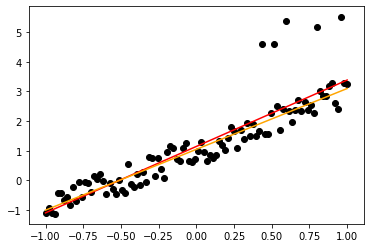

In [ ]:
# Gerando os pontos de ajuste da função
X = np.zeros((2,100))
X[0,:] = np.linspace(-1,1,100)
X[1,:] = 1 + 2*X[0,:] + np.random.uniform(-0.5,0.5,100)

# perturbando pontos aleatórios
pert = np.random.randint(int(2*X.shape[1]/3),X.shape[1],5)
X[1,pert] += 3.0

# Construindo a matriz A
A = np.ones((X.shape[1],2))
A[:,1] = X[0,:]

#Resolvendo as equacoes normais
alpha = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,X[1,:]))
print(alpha)

yo = alpha[0] + alpha[1]*X[0,:]

# Calculando os erros
errov = yo-X[1,:]

# Calculando a matriz de pesos com o inverso do erro em cada ponto
W = np.diag(np.exp(-errov**2))

# Resolvendo as equacoes normais ponderadas
AtWtWA = np.linalg.multi_dot([A.T,W.T,W,A])
AtWtWf = np.linalg.multi_dot([A.T,W.T,W,X[1,:]])
alphaw = np.linalg.solve(AtWtWA,AtWtWf)
print(alphaw)

#yw = alphaw[0] + alphaw[1]*X[0,:]
yw = np.dot(A,alphaw)

# plotando os resultados
plt.scatter(X[0,:],X[1,:],color='k')
plt.plot(X[0,:],yo,color='red')
plt.plot(X[0,:],yw,color='orange')